In [ ]:
# 📦 Step 1: Install PyTorch Tabular
!pip install pytorch-tabular

In [13]:
# 📄 Title: AI-Driven Metrics for Evaluating Employee Efficiency in Remote Work Environments using GANet

# 🧠 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models import GANDALFConfig  # GANet Config
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

# 📁 Step 3: Load & Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/Lydia/SC2/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")
df = df.drop(columns=["Employee_ID", "Hire_Date"])
df = df.rename(columns={"Performance_Score": "PerformanceScore"})

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
continuous_cols = [col for col in df.columns if col not in categorical_cols + ["PerformanceScore", "Resigned"]]

train, test = train_test_split(df, test_size=0.2, random_state=42)

# 📋 Step 4: Data Configuration
data_config = DataConfig(
    target=["PerformanceScore"],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

# ⚙️ Step 5: GANet (GANDALF) Model Configuration
model_config = GANDALFConfig(
 task="regression",                              # Predict continuous efficiency score
    metrics=["mean_squared_error", "r2_score"],     # Evaluation metrics
    learning_rate=1e-3,

    batch_norm_continuous_input=True,
    head="LinearHead"
)

# 🛠 Step 6: Trainer & Optimizer Configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    max_epochs=10,
    accelerator="auto",
    devices=1,
    load_best=False
)

optimizer_config = OptimizerConfig()

# 🚀 Step 7: Initialize and Train GANet
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train, validation=test)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.15848931924611143
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_87f3a832-6bb8-4823-af52-8b285156e9d7.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_87f3a832-6bb8-4823-af52-8b285156e9d7.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.15848931924611143. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.models.gandalf.gandalf:Data Aware Initialization of T0
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │ 25.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │    129 │ train │
│ 2 │ _head            │ Sequential       │     28 │ train │
│ 3 │ loss             │ MSELoss          │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 25.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 25.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 31                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed


Output()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.029189428314566612    │
│  test_mean_squared_error  │   0.029189428314566612    │
│       test_r2_score       │    0.9853901267051697     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.029189428314566612, 'test_mean_squared_error': 0.029189428314566612, 'test_r2_score': 0.9853901267051697}]


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     2.090955
80184                     3.873775
19864                     2.935787
76699                     1.050547
92991                     3.625180


In [14]:
# 📊 Step 8: Evaluate Model
results = tabular_model.evaluate(test)
print("📈 Evaluation Results:", results)

Output()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.029189428314566612    │
│  test_mean_squared_error  │   0.029189428314566612    │
│       test_r2_score       │    0.9853901267051697     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.029189428314566612, 'test_mean_squared_error': 0.029189428314566612, 'test_r2_score': 0.9853901267051697}]


In [15]:
preds = tabular_model.predict(test)
print(preds.head())

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     2.090955
80184                     3.873775
19864                     2.935787
76699                     1.050547
92991                     3.625180


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Make predictions
preds = tabular_model.predict(test)

# Extract predicted and actual
y_true = test["PerformanceScore"].values
y_pred = preds["PerformanceScore_prediction"].values

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
msle = mean_squared_log_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print metrics
print("\n🔍 Additional Regression Metrics:")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"🧮 Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"📊 Mean Absolute Percentage Error (MAPE): {mape:.2%}")

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value


🔍 Additional Regression Metrics:
📏 Mean Absolute Error (MAE): 0.1421
📉 Root Mean Squared Error (RMSE): 0.1708
📈 R² Score: 0.9854
🧮 Mean Squared Log Error (MSLE): 0.0022
📊 Mean Absolute Percentage Error (MAPE): 6.05%


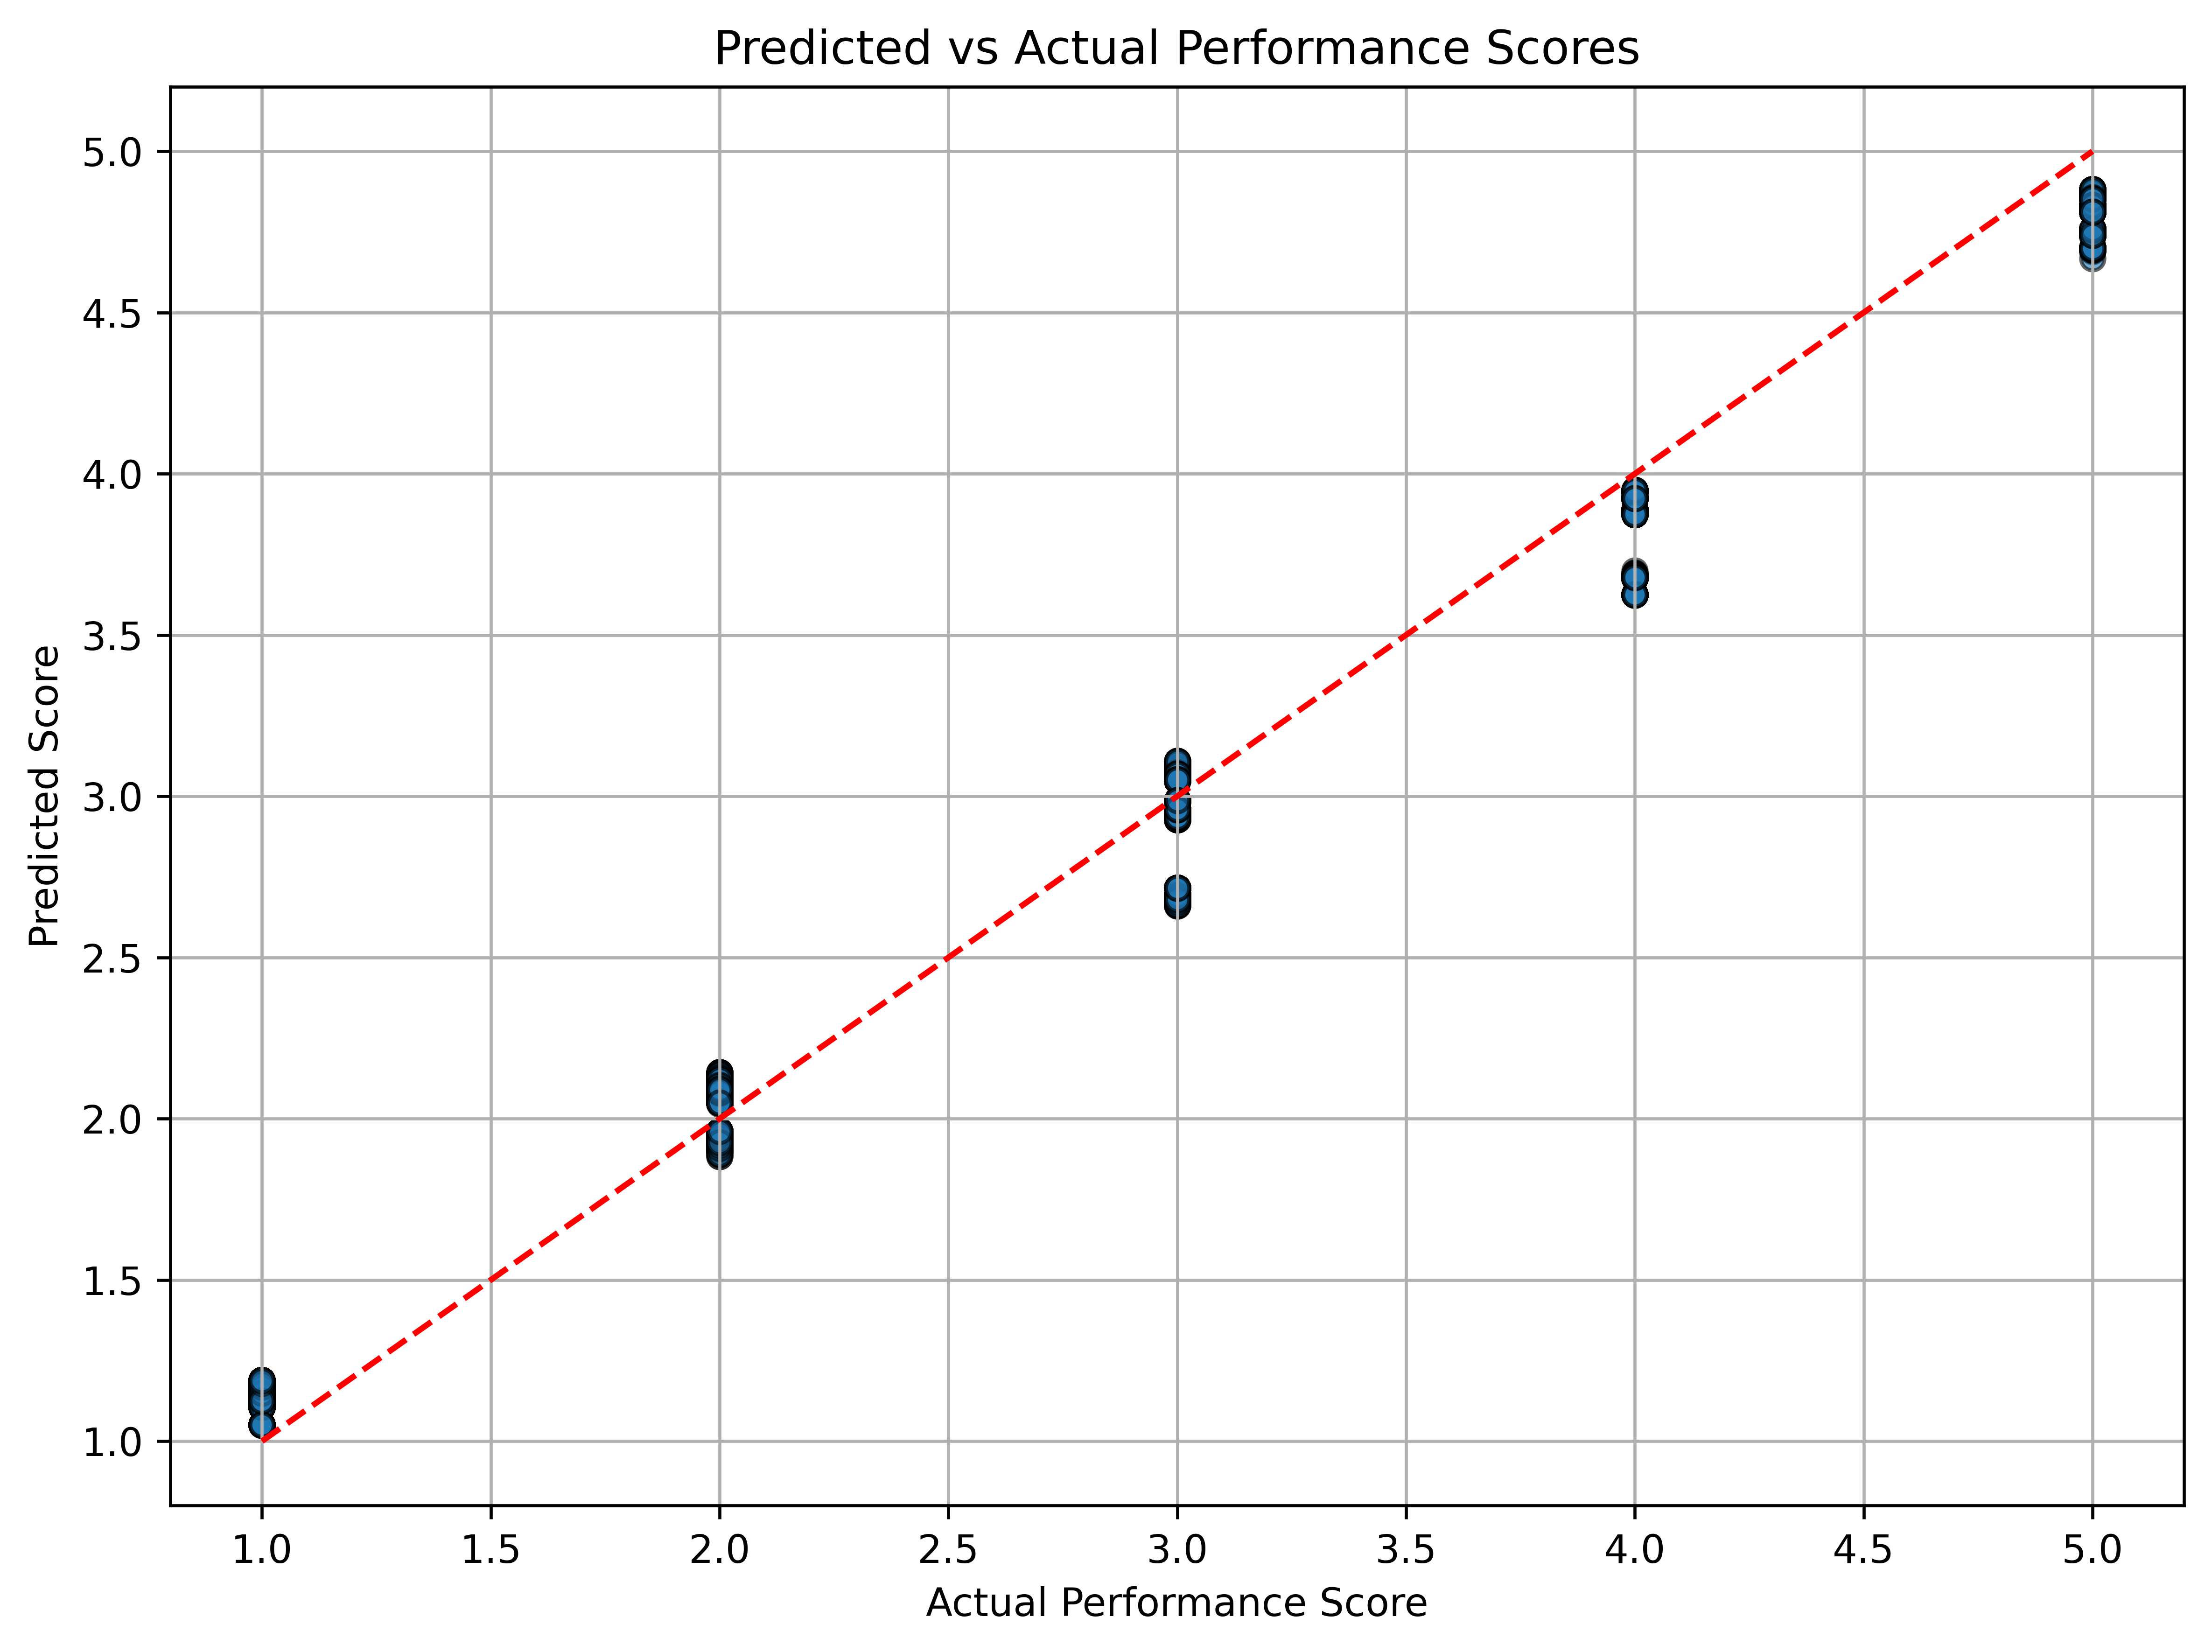

In [17]:
# 📈 Visualization & Metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_squared_log_error, mean_absolute_percentage_error
)

actual = test["PerformanceScore"].values
predicted = preds["PerformanceScore_prediction"].values

plt.figure(figsize=(8, 6), dpi=600)
plt.scatter(actual, predicted, alpha=0.6, edgecolors='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Performance Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

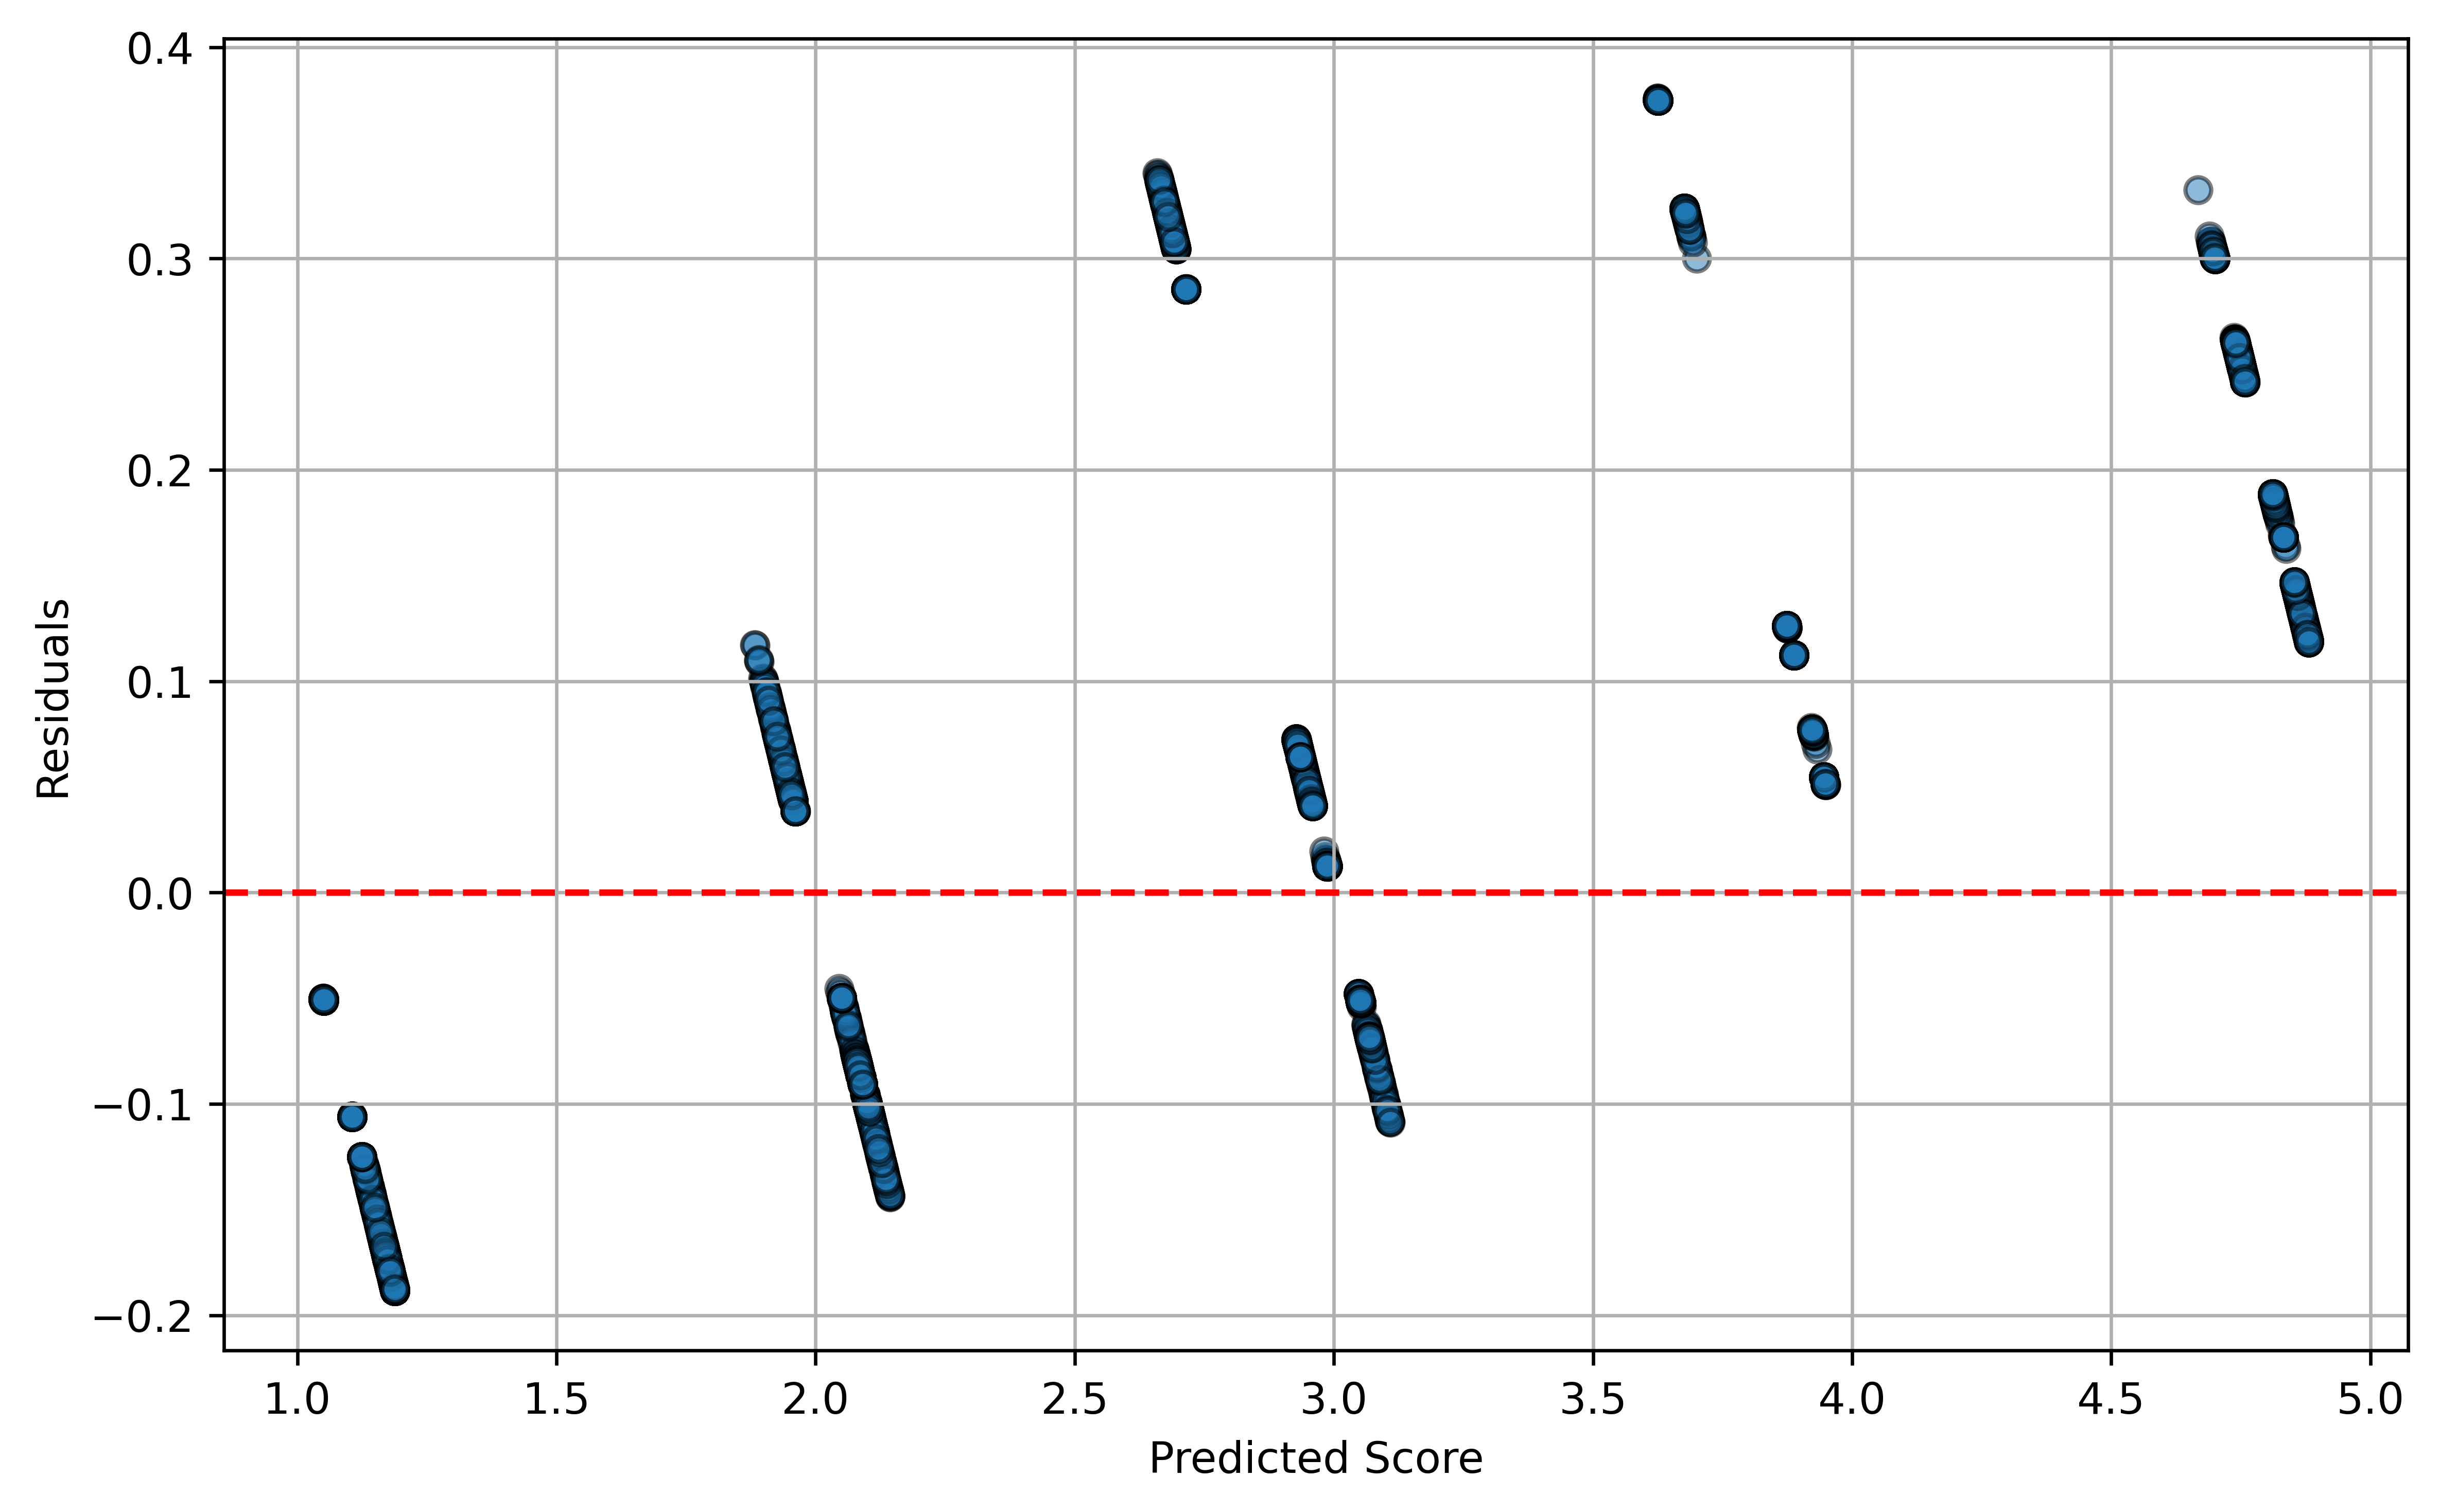

In [19]:
# 📉 Residual Plots
residuals = actual - predicted

plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(predicted, residuals, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

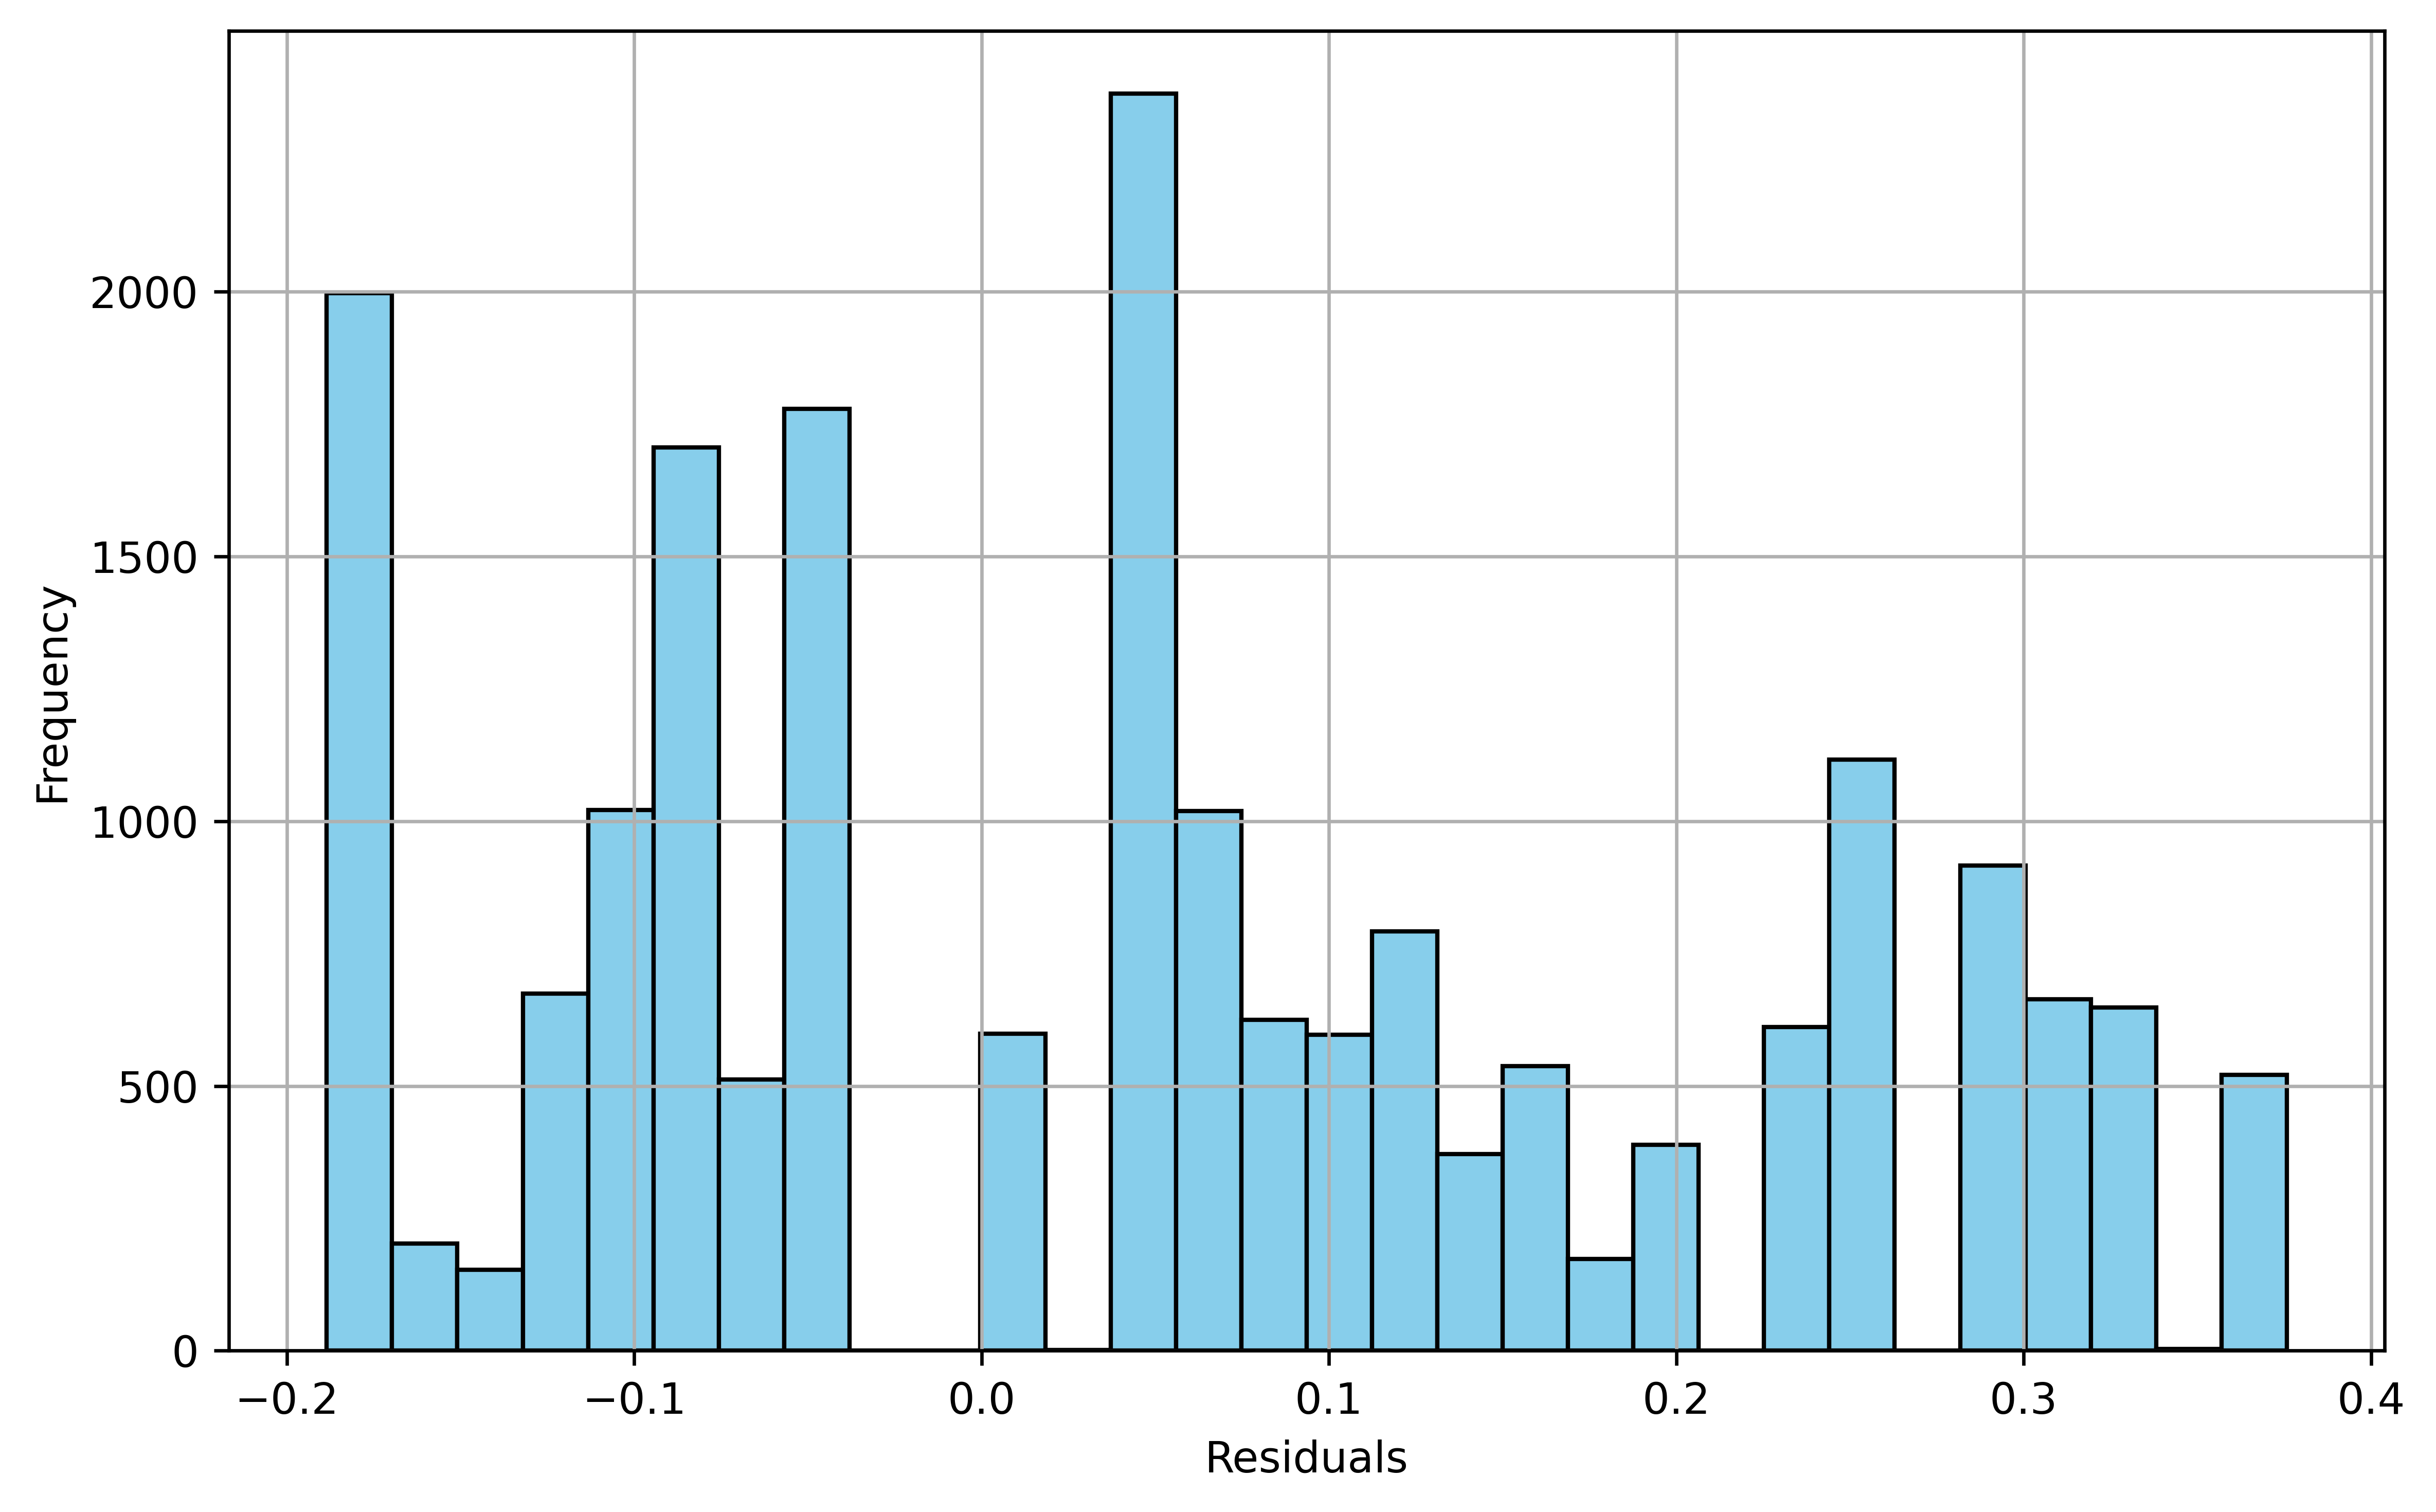

In [26]:
plt.figure(figsize=(8, 5), dpi=600)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

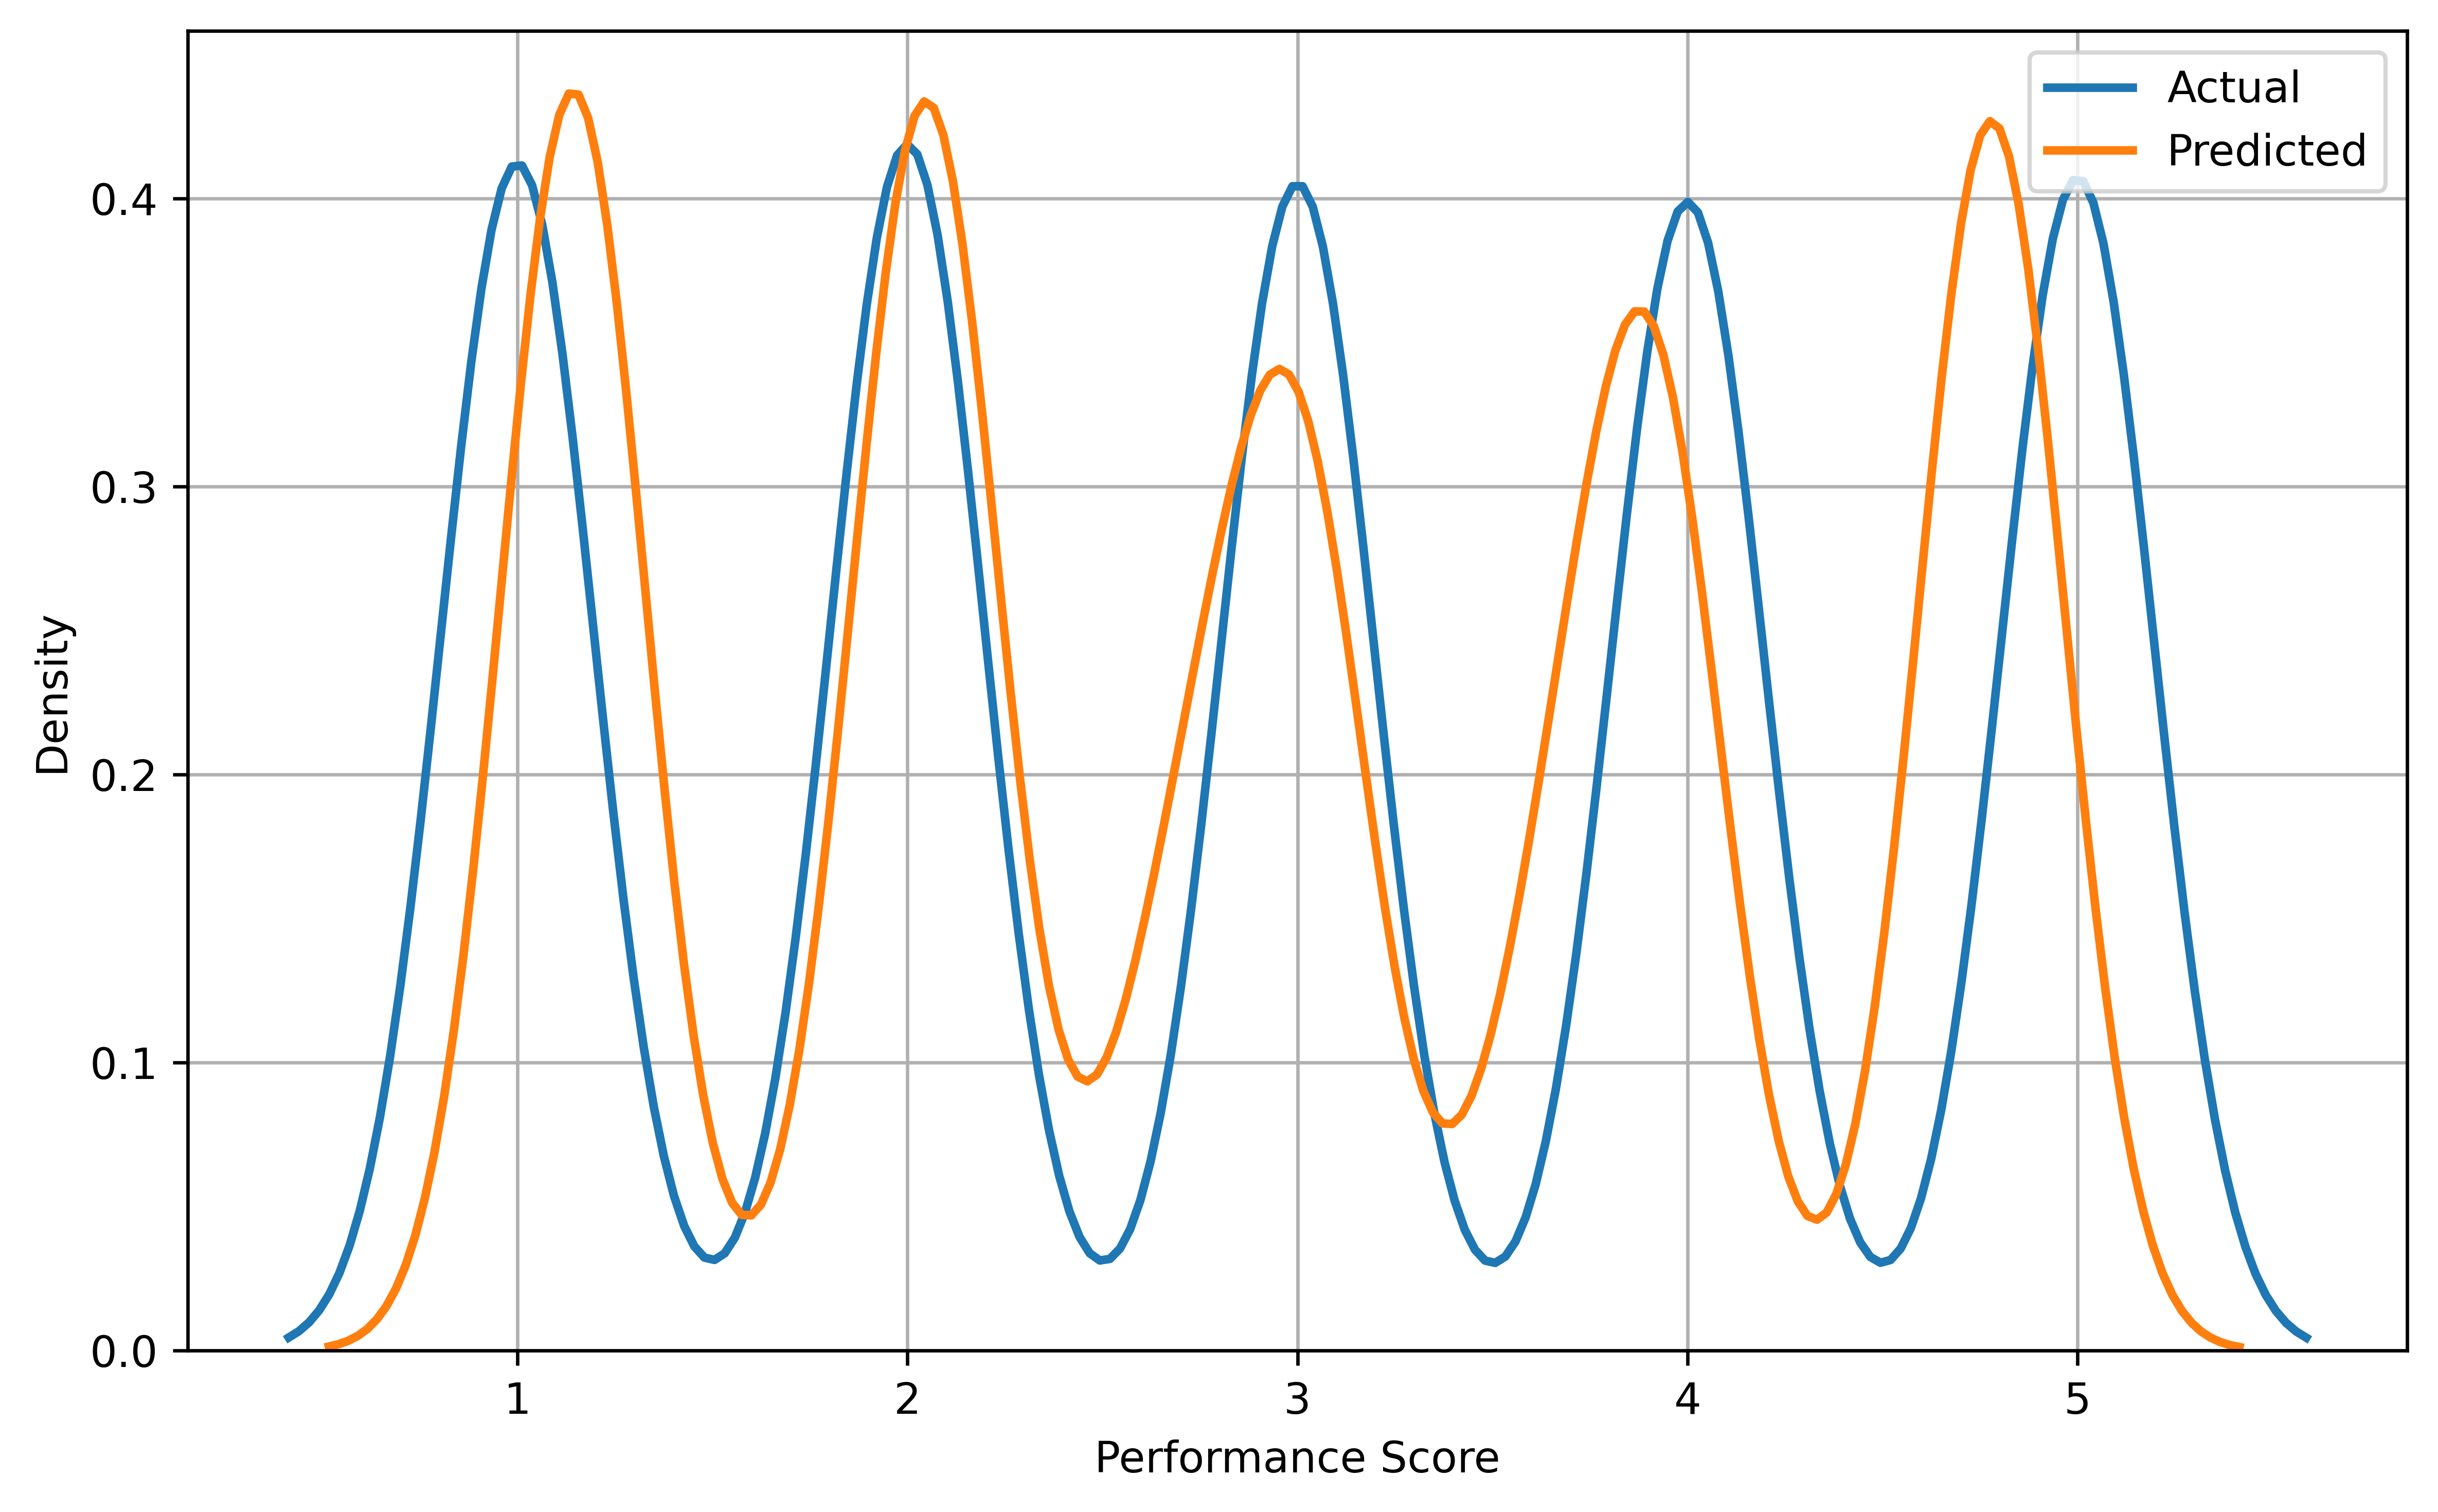

In [27]:
# 📈 KDE & Q-Q Plot
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(8, 5), dpi=600)
sns.kdeplot(actual, label="Actual", linewidth=2)
sns.kdeplot(predicted, label="Predicted", linewidth=2)
plt.xlabel("Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

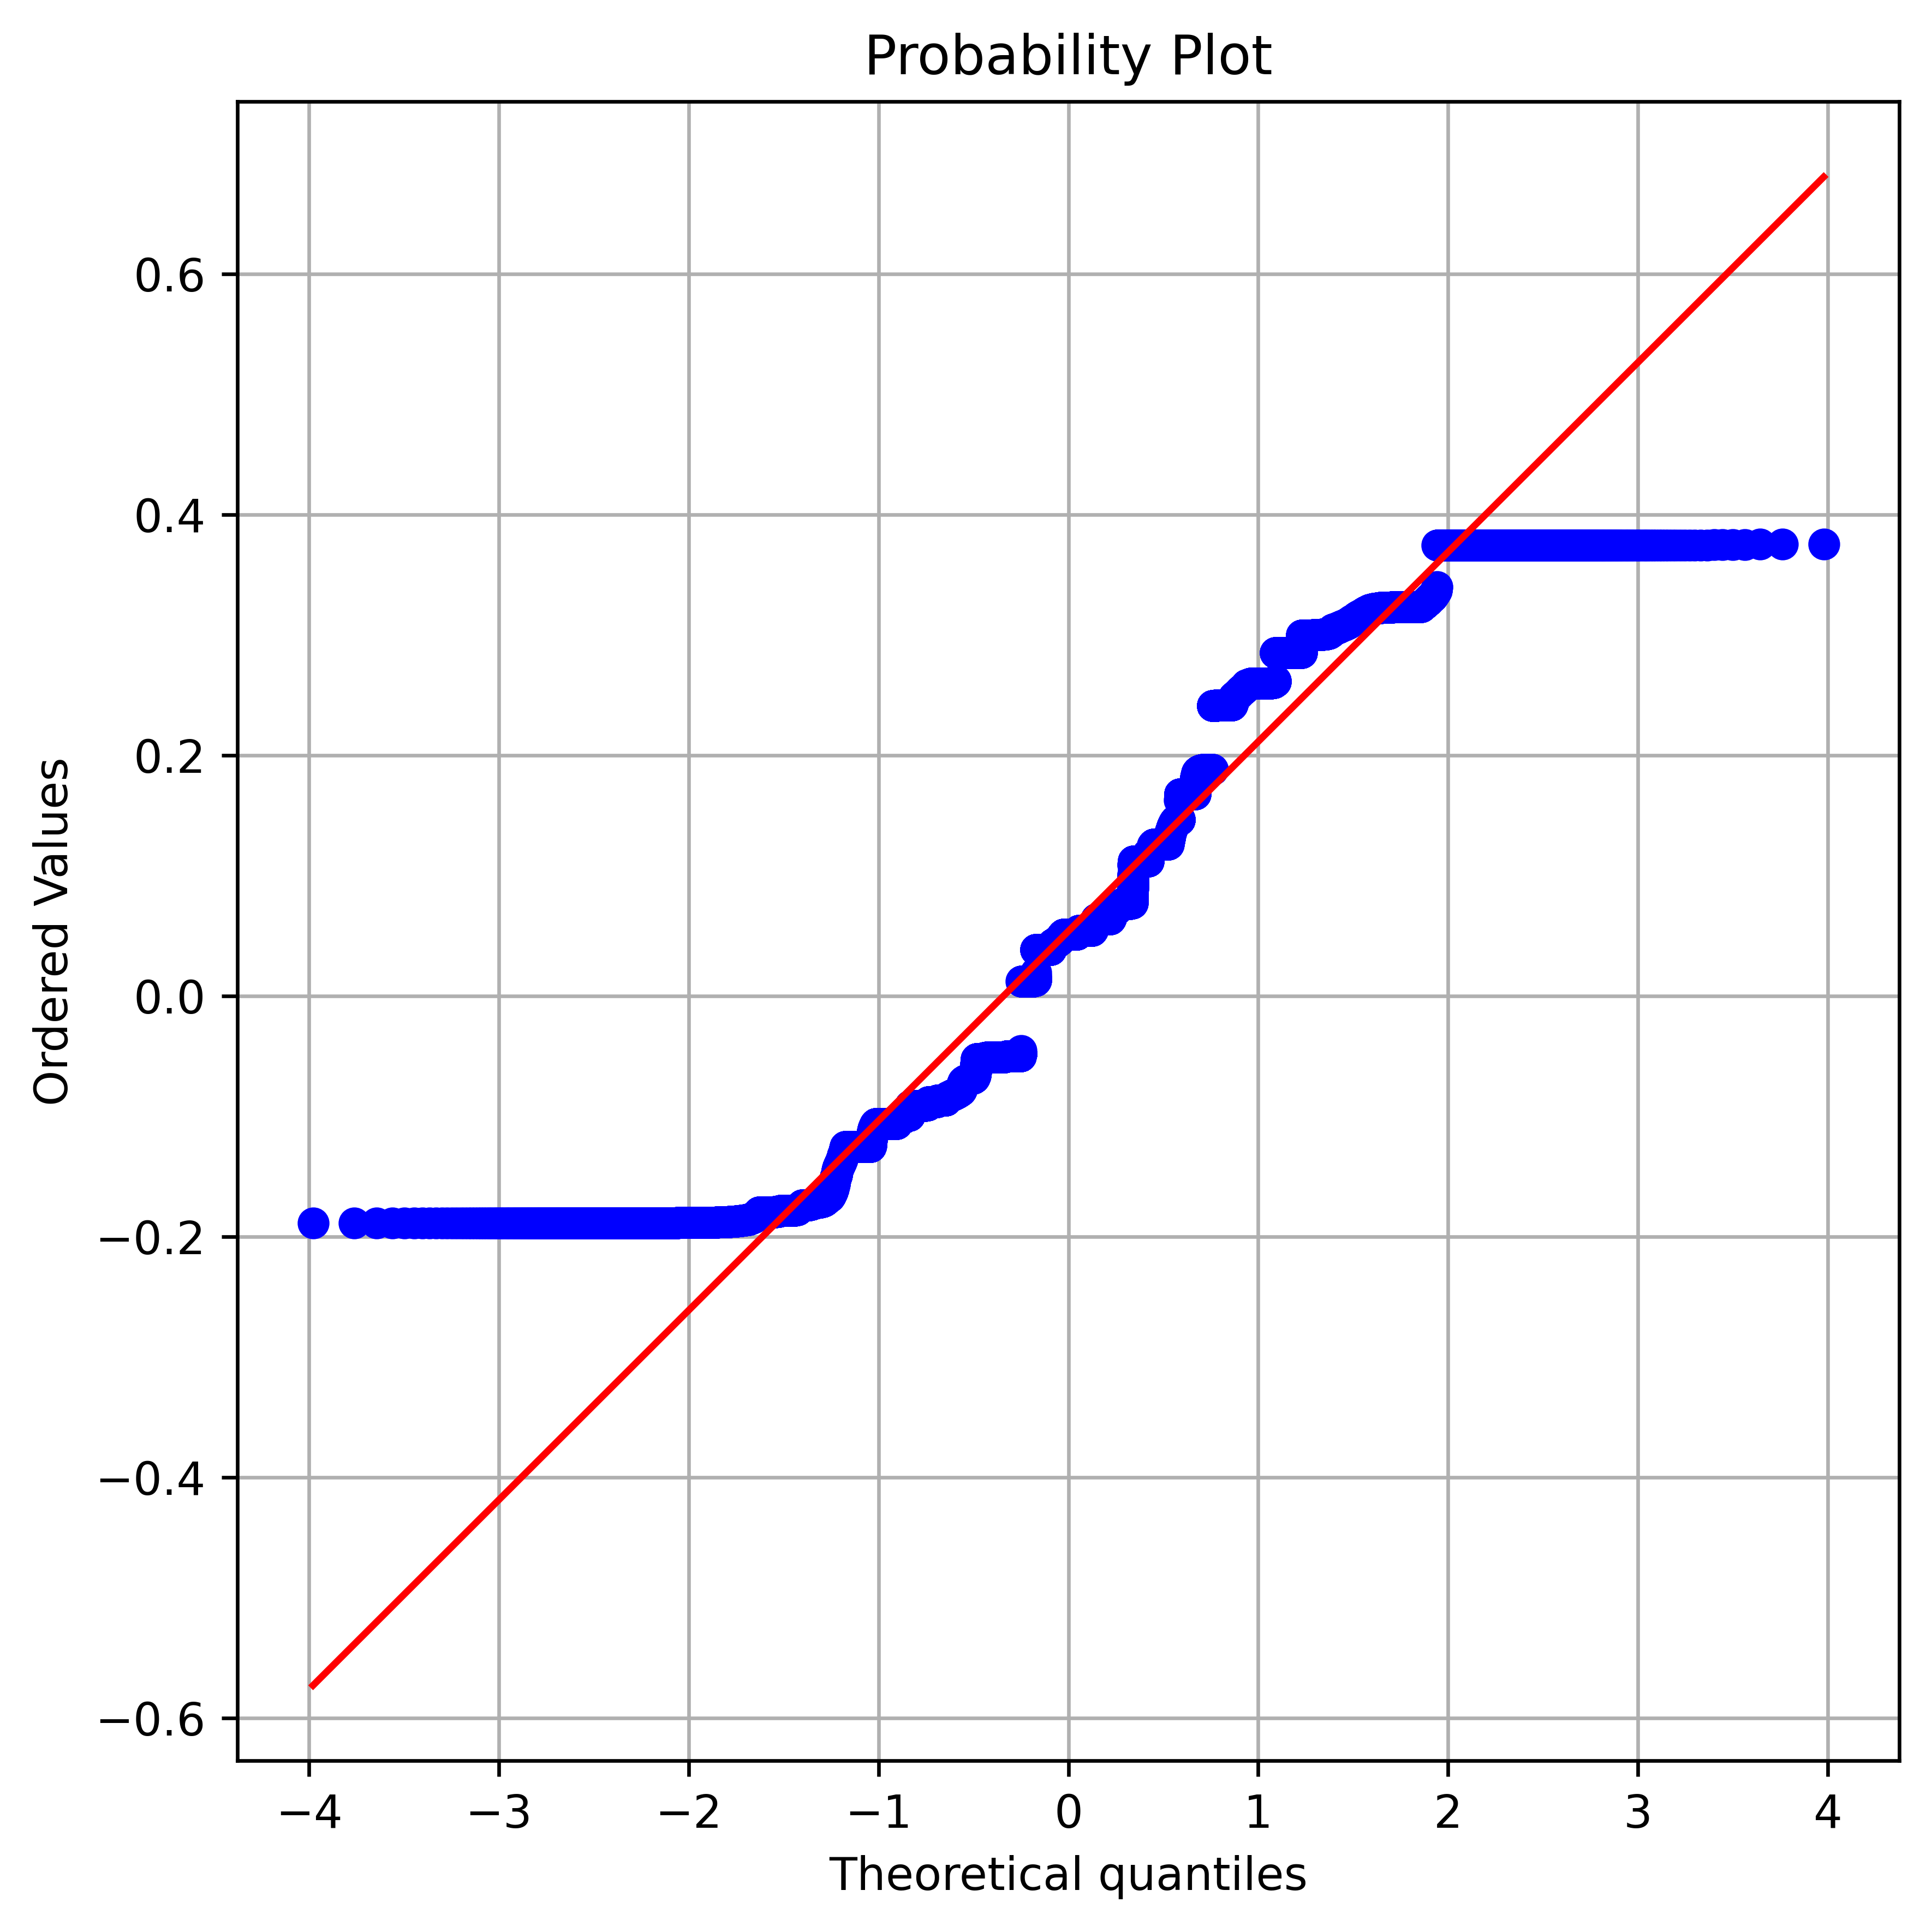

In [28]:
plt.figure(figsize=(6, 6), dpi=600)
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install shap
!pip install lime

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

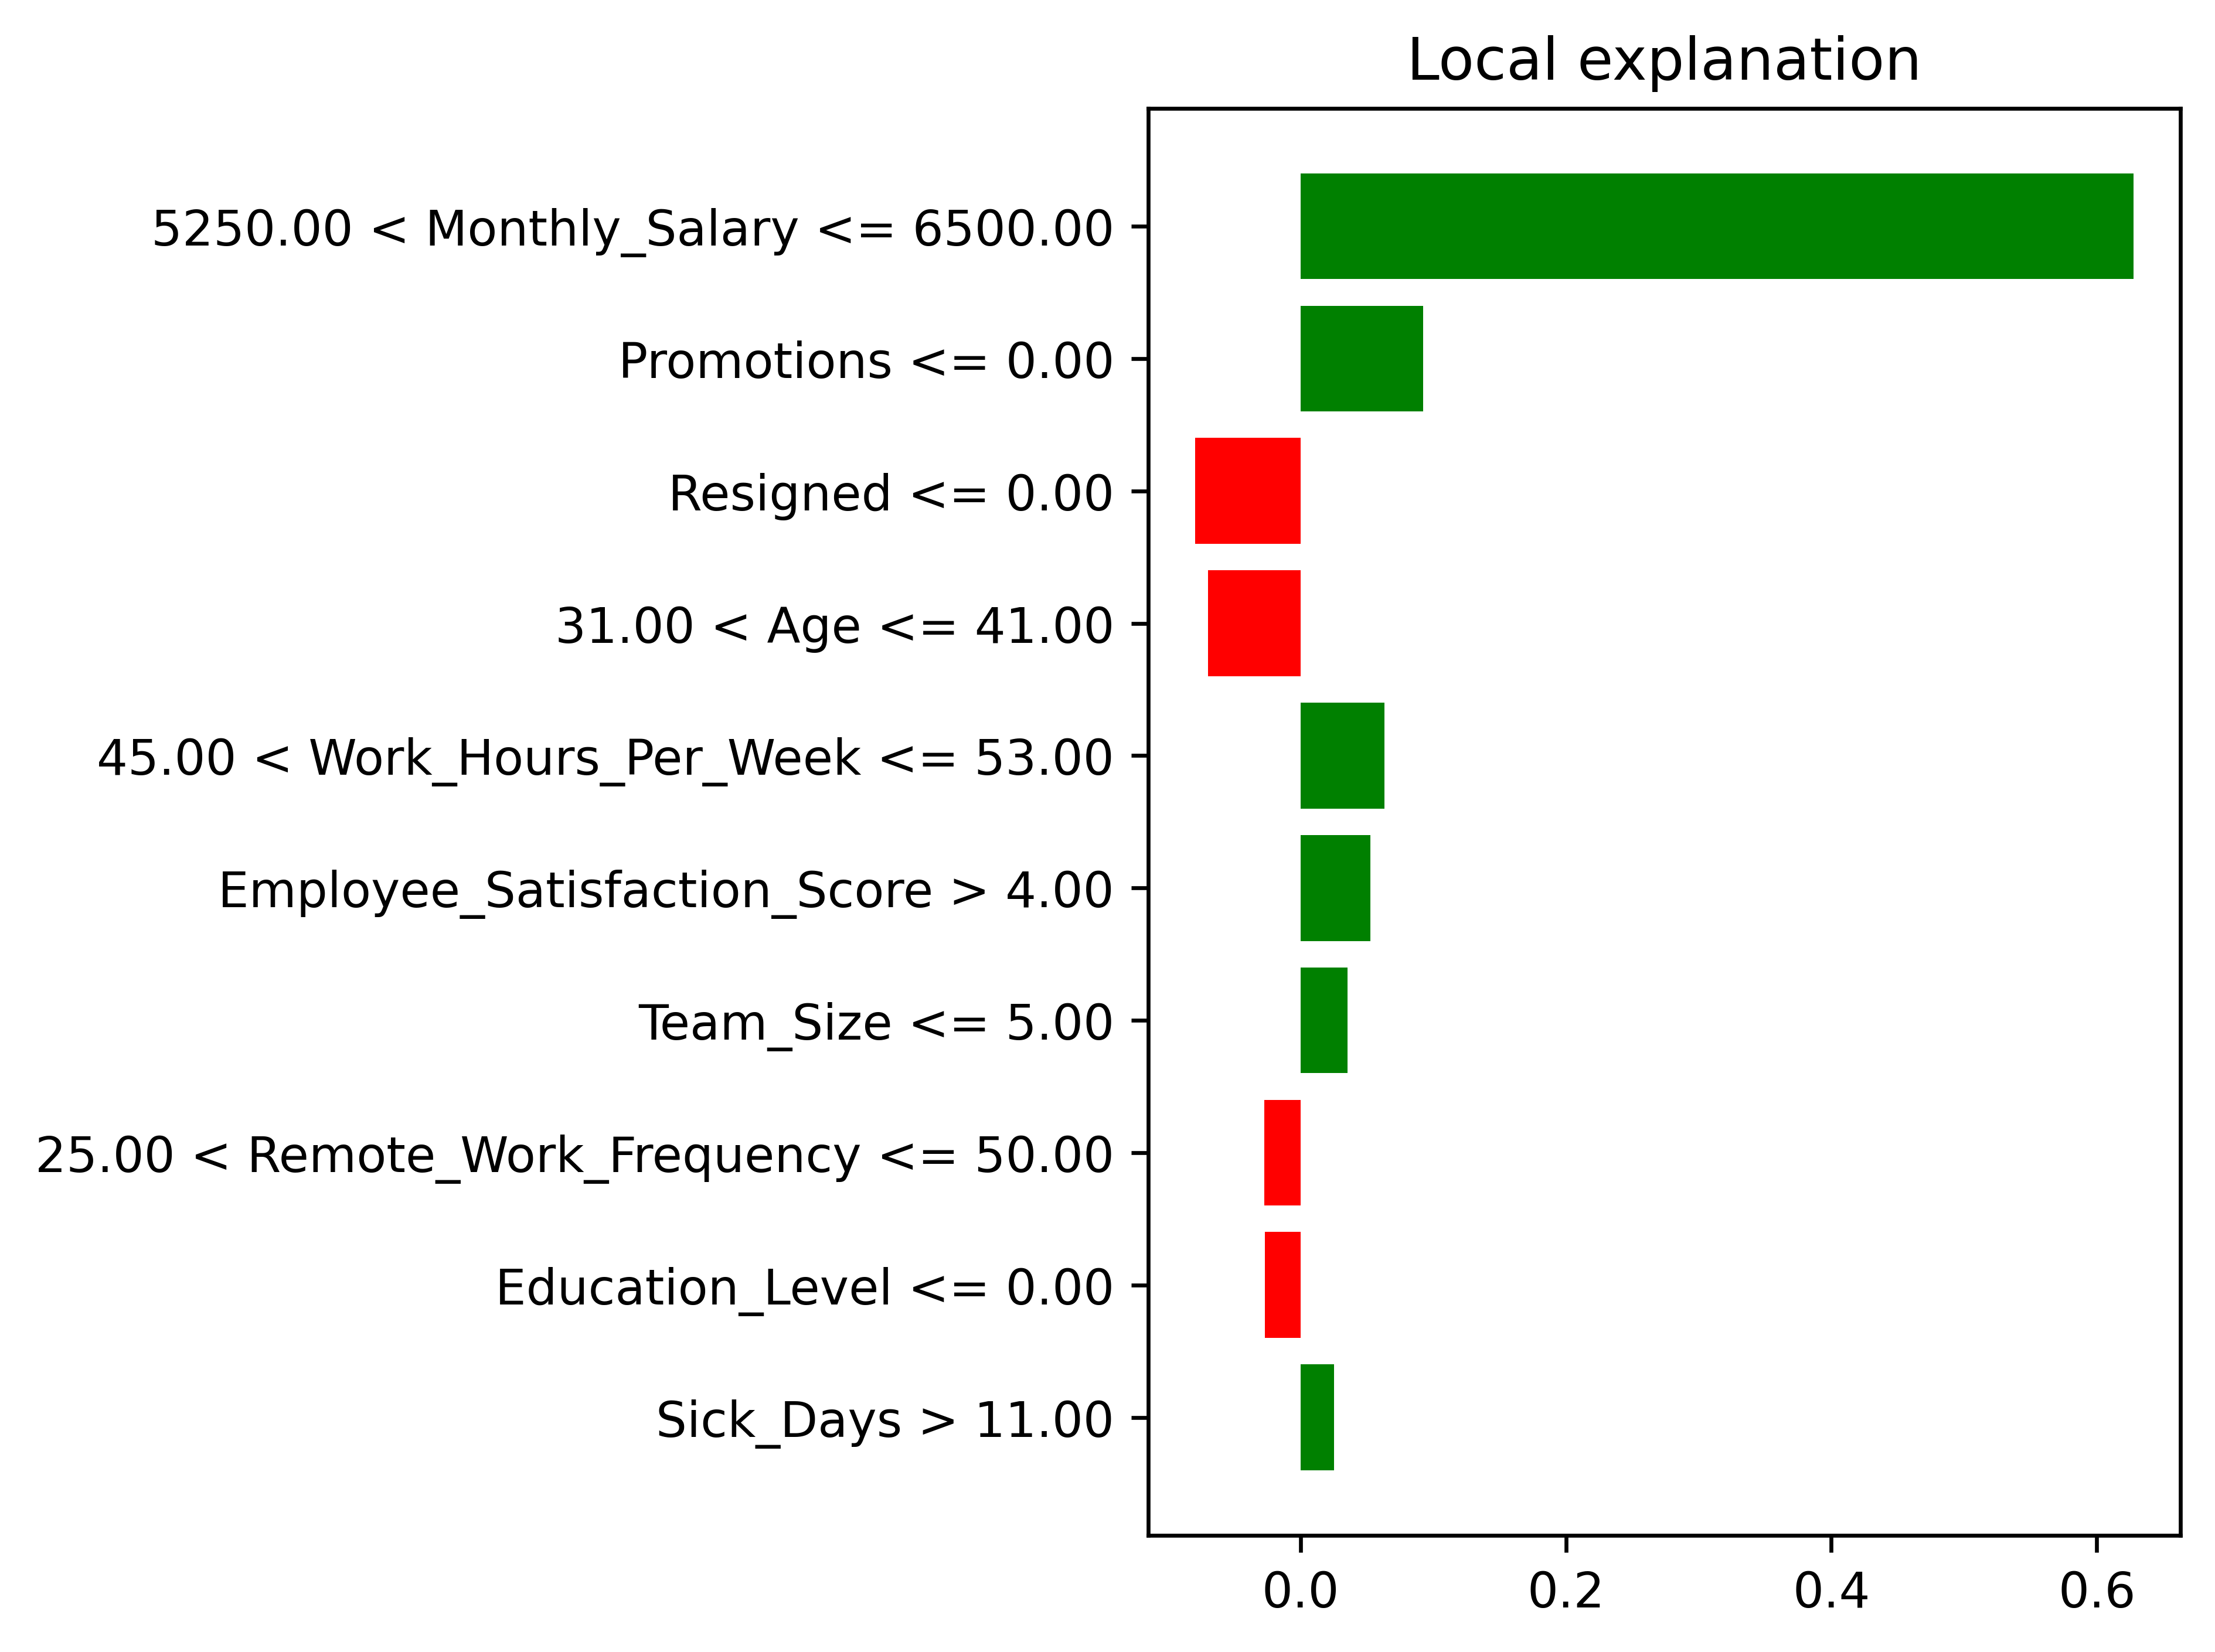

In [30]:
# 🧠 LIME Explanation
import numpy as np
import matplotlib.pyplot as plt
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder

X_train = train.drop(columns=["PerformanceScore"]).copy()
X_test = test.drop(columns=["PerformanceScore"]).copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

def model_predict(data_as_array):
    df = pd.DataFrame(data_as_array, columns=X_train.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

sample_index = 5
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_index].values,
    predict_fn=model_predict,
    num_features=10
)

fig = lime_exp.as_pyplot_figure()
fig.set_dpi(600)
plt.tight_layout()
plt.savefig("lime_explanation_sample_5.png")
plt.show()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on th

  0%|          | 0/100 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col:

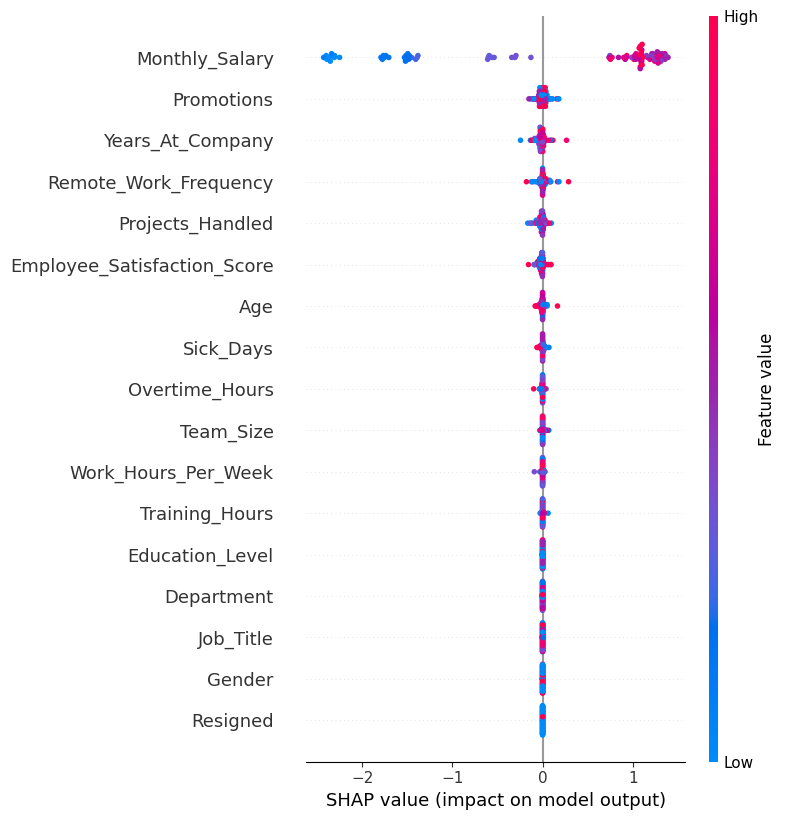

                        Feature  Mean |SHAP Value|
6                Monthly_Salary           1.296226
14                   Promotions           0.040203
4              Years_At_Company           0.033084
11        Remote_Work_Frequency           0.027231
8              Projects_Handled           0.023849
15  Employee_Satisfaction_Score           0.021414
2                           Age           0.013579
10                    Sick_Days           0.011376
9                Overtime_Hours           0.006621
12                    Team_Size           0.006071


In [31]:
# 🧠 SHAP Explanation
import shap

X_test_input = test.drop(columns=["PerformanceScore"]).copy()
X_test_encoded = X_test_input.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(X_test_encoded[col])

X_sample = X_test_encoded.sample(100, random_state=42)

def model_predict(data_array):
    df = pd.DataFrame(data_array, columns=X_sample.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

background = X_sample.sample(10, random_state=42).values
explainer = shap.KernelExplainer(model_predict, background)

shap_values = explainer.shap_values(X_sample.values)

shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_plot.png", dpi=300)
plt.show()

shap_avg_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "Feature": X_sample.columns,
    "Mean |SHAP Value|": shap_avg_importance
}).sort_values("Mean |SHAP Value|", ascending=False)

print(importance_df.head(10))